In [28]:
import numpy as np
import osmnx as ox
from geopandas import GeoSeries
from shapely.geometry import Point

np.random.seed(0)
ox.__version__
ox.settings.use_cache= True
ox.settings.log_console = True

In [29]:
G = ox.graph_from_bbox(north=28.5576, south=28.5264, east=77.7078, west=77.6472, network_type="drive")
Gp = ox.project_graph(G)
Gc = ox.consolidate_intersections(Gp, rebuild_graph=True, tolerance=20, dead_ends=False)

In [30]:
lat_longs = [Point(77.67257, 28.54757), Point(77.67375, 28.54495)]

In [31]:
Gc.graph["crs"]

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
points = GeoSeries(lat_longs, crs='wgs84')

In [33]:
points

0    POINT (77.67257 28.54757)
1    POINT (77.67375 28.54495)
dtype: geometry

In [34]:
points_proj = points.to_crs(epsg="32643")

In [42]:
points_proj

0    POINT (761485.431 3160777.699)
1    POINT (761607.410 3160489.849)
dtype: geometry

In [36]:
for pt in points_proj:
    print(pt.x, pt.y)

761485.4307915947 3160777.698860527
761607.4096601128 3160489.8488971875


In [70]:
nodes = []
for pt in points_proj:
    nodes.append(ox.nearest_nodes(Gc, pt.x, pt.y))

nodes

[172, 46]

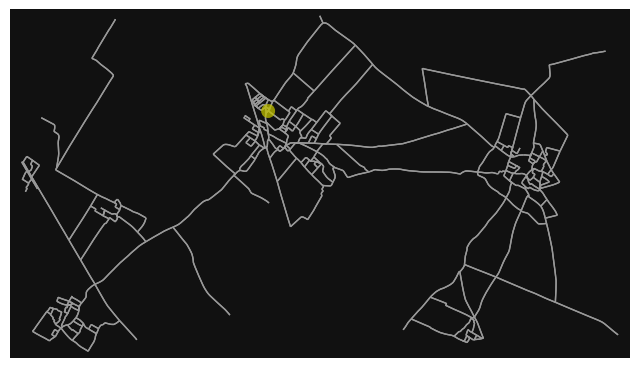

In [74]:
mapx, ax = ox.plot_graph_route(Gc, [nodes[0]], route_color="y", route_linewidth=6, node_size=0)

In [75]:
print(ox.shortest_path(Gc, nodes[0], nodes[1], weight="length"))

[172, 170, 159, 46]


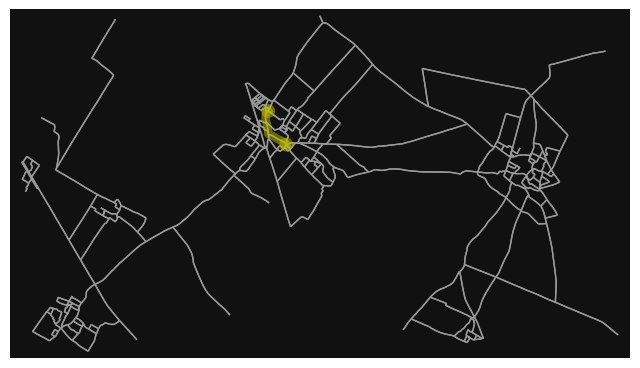

In [76]:
route = ox.shortest_path(Gc, nodes[0], nodes[1], weight="length")
fig, ax = ox.plot_graph_route(Gc, route, route_color="y", route_linewidth=6, node_size=0)

0
120
[0, 2, 72, 57, 55, 53, 52, 50, 48, 47, 157, 159, 170, 172, 120]


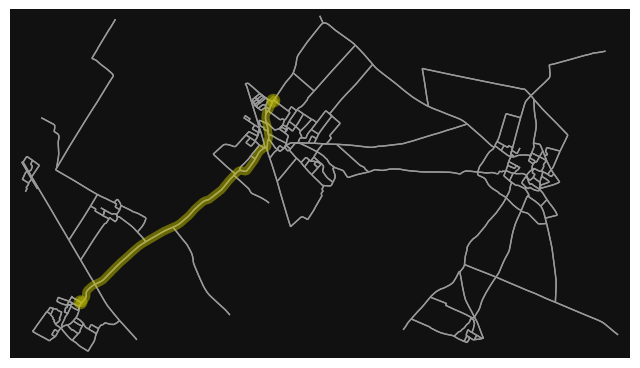

In [61]:


# find the shortest path (by distance) between these nodes then plot it
orig = list(Gc)[0]
dest = list(Gc)[120]
print(orig)
print(dest)
route = ox.shortest_path(Gc, orig, dest, weight="length")
print(route)
fig, ax = ox.plot_graph_route(Gc, route, route_color="y", route_linewidth=6, node_size=0)

